In [2]:
import pandas as pd

In [29]:
df = pd.read_csv('train/Tweets.csv')
df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [30]:
df = df[['text','sentiment']]
df

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative
...,...,...
27476,wish we could come see u on Denver husband l...,negative
27477,I`ve wondered about rake to. The client has ...,negative
27478,Yay good for both of you. Enjoy the break - y...,positive
27479,But it was worth it ****.,positive


In [31]:
df.sentiment.replace({'negative':0,"neutral":1,'positive':2}, inplace=True)

C:\Users\alienware\AppData\Local\Temp\ipykernel_24024\2155364140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sentiment.replace({"neutral":1,'positive':2,'negative':0}, inplace=True)


In [32]:
df = df.dropna()

In [33]:
import nltk
import re
import string

In [34]:
import nltk
import re
import string
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text


def text_preprocessing(text):
    """
    Cleaning and parsing the text.

    """
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    nopunc = clean_text(text)
    tokenized_text = tokenizer.tokenize(nopunc)
    #remove_stopwords = [w for w in tokenized_text if w not in stopwords.words('english')]
    combined_text = ' '.join(tokenized_text)
    return combined_text

In [35]:
df.text = df.text.apply(text_preprocessing)

C:\Users\alienware\AppData\Local\Temp\ipykernel_24024\3548849271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.text = df.text.apply(text_preprocessing)


In [36]:
df = df.sample(frac=1).reset_index(drop=True)

In [37]:
df

,text,sentiment
0,ugggh school is so boring i cant wait for this...,0
1,good morning tweeties,2
2,fml i stepped on a needle ouch waaaaa drycleaners,0
3,yeah i think it just depends on what youre doi...,1
4,finally home after a big of travelling ahhhhhh...,2
...,...,...
27475,its bout smoking weed,1
27476,i think thats pretty awesome i could quote lot...,2
27477,went to sleep and there is a power cut in noid...,0
27478,whar a night woo hoo yeah a beautiful night to...,1


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

In [40]:
token_lens  = []
for i in df.text:
    tokens = tokenizer.encode(i, max_length=512)
    token_lens.append(len(tokens))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


c:\Users\alienware\anaconda3\envs\bert\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


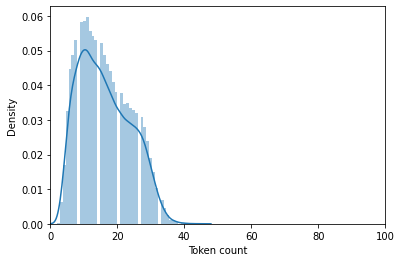

In [41]:
sns.distplot(token_lens)
plt.xlim([0, 100]);
plt.xlabel('Token count');

In [43]:
max(token_lens)

45

In [44]:
length = int(len(df)*0.8)
val_len = int(len(df)*0.9)
train_df = df.iloc[:length]
val_df = df.iloc[length:val_len]
test_df = df.iloc[val_len:]

In [45]:
train_df.to_csv("train/train.csv")
val_df.to_csv("train/val.csv")
test_df.to_csv("train/test.csv")

In [46]:
test_df

,text,sentiment
24732,the grates children collide tonight,1
24733,going to sleep gonna fall asleep playing apps ...,0
24734,looool me ana i will vote ele now,1
24735,oh no i hope you reach him,2
24736,see you on may,1
...,...,...
27475,its bout smoking weed,1
27476,i think thats pretty awesome i could quote lot...,2
27477,went to sleep and there is a power cut in noid...,0
27478,whar a night woo hoo yeah a beautiful night to...,1


In [47]:
train_df

,text,sentiment
0,ugggh school is so boring i cant wait for this...,0
1,good morning tweeties,2
2,fml i stepped on a needle ouch waaaaa drycleaners,0
3,yeah i think it just depends on what youre doi...,1
4,finally home after a big of travelling ahhhhhh...,2
...,...,...
21979,mr amp over heated,1
21980,has just finished ironing his clothes for chur...,2
21981,i miss you too mojokins i go there but not lon...,0
21982,wow almost got involved in this big fight at s...,2
